In [1]:
# Import library for data manipulation
import pandas as pd
import numpy as np

# Import library for plotting
import matplotlib.pyplot as plt

# Import library to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
'''
# Load the dataset
df = pd.read_excel('globalterrorismdb_0522dist.xlsx')

# Filter the data for relevant columns to simplify the dataset
# Focus on year (iyear), country, region, and other terrorism-related details
relevant_columns = [
    'eventid', 'iyear', 'imonth', 'iday', 'country_txt', 'region_txt',
    'attacktype1_txt', 'target1', 'nkill', 'nwound', 'weaptype1_txt', 'gname'
]
df = df[relevant_columns]

# Filter for events in the Middle East and North Africa (MENA) region after 2000
df = df[(df['region_txt'] == 'Middle East & North Africa') & (df['iyear'] >= 2000)]

# Save the DataFrame to a .csv file
df.to_csv('globalterrorismdb_MENA.csv', index=False)
'''

"\n# Load the dataset\ndf = pd.read_excel('globalterrorismdb_0522dist.xlsx')\n\n# Filter the data for relevant columns to simplify the dataset\n# Focus on year (iyear), country, region, and other terrorism-related details\nrelevant_columns = [\n    'eventid', 'iyear', 'imonth', 'iday', 'country_txt', 'region_txt',\n    'attacktype1_txt', 'target1', 'nkill', 'nwound', 'weaptype1_txt', 'gname'\n]\ndf = df[relevant_columns]\n\n# Filter for events in the Middle East and North Africa (MENA) region after 2000\ndf = df[(df['region_txt'] == 'Middle East & North Africa') & (df['iyear'] >= 2000)]\n\n# Save the DataFrame to a .csv file\ndf.to_csv('globalterrorismdb_MENA.csv', index=False)\n"

In [3]:
'''
df = pd.read_csv('globalterrorismdb_MENA.csv')

mena_countries = [
    'Algeria', 'Bahrain', 'Djibouti', 'Egypt', 'Iran', 'Iraq', 'Israel', 'Jordan',
    'Kuwait', 'Lebanon', 'Libya', 'Morocco', 'Oman', 'Palestinian Territories',
    'Qatar', 'Saudi Arabia', 'Somalia', 'Sudan', 'Syria', 'Tunisia', 'Turkey',
    'United Arab Emirates', 'Yemen', 'West Bank and Gaza Strip'
]

df = df[df['country_txt'].isin(mena_countries)]
'''

"\ndf = pd.read_csv('globalterrorismdb_MENA.csv')\n\nmena_countries = [\n    'Algeria', 'Bahrain', 'Djibouti', 'Egypt', 'Iran', 'Iraq', 'Israel', 'Jordan',\n    'Kuwait', 'Lebanon', 'Libya', 'Morocco', 'Oman', 'Palestinian Territories',\n    'Qatar', 'Saudi Arabia', 'Somalia', 'Sudan', 'Syria', 'Tunisia', 'Turkey',\n    'United Arab Emirates', 'Yemen', 'West Bank and Gaza Strip'\n]\n\ndf = df[df['country_txt'].isin(mena_countries)]\n"

In [4]:
'''
corruption_df = pd.read_csv('history.csv')

corruption_df = corruption_df[corruption_df['Region'] == 'Middle East and North Africa']

# Save the DataFrame to a .csv file
corruption_df.to_csv('Corruption_Index_MENA.csv', index=False)
'''

"\ncorruption_df = pd.read_csv('history.csv')\n\ncorruption_df = corruption_df[corruption_df['Region'] == 'Middle East and North Africa']\n\n# Save the DataFrame to a .csv file\ncorruption_df.to_csv('Corruption_Index_MENA.csv', index=False)\n"

In [5]:
'''
political_df = pd.read_csv('Political Stability and Absence of Violence:Terrorism.csv')

# Filter the DataFrame for MENA countries
political_df = political_df[political_df["Country Name"].isin(mena_countries)]

# Save the DataFrame to a .csv file
political_df.to_csv('Political_Stability_MENA.csv')
'''

'\npolitical_df = pd.read_csv(\'Political Stability and Absence of Violence:Terrorism.csv\')\n\n# Filter the DataFrame for MENA countries\npolitical_df = political_df[political_df["Country Name"].isin(mena_countries)]\n\n# Save the DataFrame to a .csv file\npolitical_df.to_csv(\'Political_Stability_MENA.csv\')\n'

In [6]:
'''
# Reshape the political stability dataset
political_stability_data = political_df.melt(
    id_vars=["Country Name", "Country Code"],
    var_name="Year",
    value_name="political_stability"
)

# Convert year to numeric for proper joining
political_stability_data["Year"] = pd.to_numeric(political_stability_data["Year"], errors="coerce")

# Join the datasets on country and year
merged_data = pd.merge(
    df,
    political_stability_data,
    left_on=["country_txt", "iyear"],
    right_on=["Country Name", "Year"],
    how="left"
)

# Drop unnecessary columns from the merged dataset
df = merged_data.drop(columns=["Country Name", "Country Code", "Year"])
'''

'\n# Reshape the political stability dataset\npolitical_stability_data = political_df.melt(\n    id_vars=["Country Name", "Country Code"],\n    var_name="Year",\n    value_name="political_stability"\n)\n\n# Convert year to numeric for proper joining\npolitical_stability_data["Year"] = pd.to_numeric(political_stability_data["Year"], errors="coerce")\n\n# Join the datasets on country and year\nmerged_data = pd.merge(\n    df,\n    political_stability_data,\n    left_on=["country_txt", "iyear"],\n    right_on=["Country Name", "Year"],\n    how="left"\n)\n\n# Drop unnecessary columns from the merged dataset\ndf = merged_data.drop(columns=["Country Name", "Country Code", "Year"])\n'

In [7]:
'''
gdp_df = pd.read_excel('GDP_current_US_Dollar.xlsx')

# Transpose the DataFrame
gdp_df = gdp_df.T

# Make the first row the column names
gdp_df.columns = gdp_df.iloc[0]
gdp_df.reset_index(inplace=True)

# Rename the first column as "Country" (if necessary)
gdp_df.rename(columns={gdp_df.columns[0]: "Country"}, inplace=True)

# Remove the first row
GDP_df = gdp_df.iloc[1:].reset_index(drop=True)
'''

'\ngdp_df = pd.read_excel(\'GDP_current_US_Dollar.xlsx\')\n\n# Transpose the DataFrame\ngdp_df = gdp_df.T\n\n# Make the first row the column names\ngdp_df.columns = gdp_df.iloc[0]\ngdp_df.reset_index(inplace=True)\n\n# Rename the first column as "Country" (if necessary)\ngdp_df.rename(columns={gdp_df.columns[0]: "Country"}, inplace=True)\n\n# Remove the first row\nGDP_df = gdp_df.iloc[1:].reset_index(drop=True)\n'

In [8]:
'''
# Filter the DataFrame for MENA countries
gdp_df = gdp_df[gdp_df['Country'].isin(mena_countries)]

# Save the DataFrame to a .csv file
gdp_df.to_csv('GDP_MENA.csv', index=False)
'''

"\n# Filter the DataFrame for MENA countries\ngdp_df = gdp_df[gdp_df['Country'].isin(mena_countries)]\n\n# Save the DataFrame to a .csv file\ngdp_df.to_csv('GDP_MENA.csv', index=False)\n"

In [9]:
'''
# Reshape the GDP data to make years columns into rows for easier joining
gdp_df = gdp_df.melt(
    id_vars=["Country"],
    var_name="Year",
    value_name="GDP"
)

# Convert the Year column to numeric for proper matching
gdp_df["Year"] = pd.to_numeric(gdp_df["Year"], errors="coerce")

# Join the datasets based on country and year
merged_data = pd.merge(
    df,
    gdp_df,
    left_on=["country_txt", "iyear"],
    right_on=["Country", "Year"],
    how="left"
)

# Drop unnecessary columns from the merged dataset
df = merged_data.drop(columns=["Country", "Year"])
'''

'\n# Reshape the GDP data to make years columns into rows for easier joining\ngdp_df = gdp_df.melt(\n    id_vars=["Country"],\n    var_name="Year",\n    value_name="GDP"\n)\n\n# Convert the Year column to numeric for proper matching\ngdp_df["Year"] = pd.to_numeric(gdp_df["Year"], errors="coerce")\n\n# Join the datasets based on country and year\nmerged_data = pd.merge(\n    df,\n    gdp_df,\n    left_on=["country_txt", "iyear"],\n    right_on=["Country", "Year"],\n    how="left"\n)\n\n# Drop unnecessary columns from the merged dataset\ndf = merged_data.drop(columns=["Country", "Year"])\n'

In [10]:
'''
cpi_df = pd.read_csv('cpi.csv', encoding='ISO-8859-1')

# Filter the DataFrame for MENA countries
cpi_df = cpi_df[cpi_df['country'].isin(mena_countries)]

# Save the DataFrame to a .csv file
cpi_df.to_csv('CPI_MENA.csv', index=False)
'''

"\ncpi_df = pd.read_csv('cpi.csv', encoding='ISO-8859-1')\n\n# Filter the DataFrame for MENA countries\ncpi_df = cpi_df[cpi_df['country'].isin(mena_countries)]\n\n# Save the DataFrame to a .csv file\ncpi_df.to_csv('CPI_MENA.csv', index=False)\n"

In [11]:
'''
# Reshape the CPI data using the correct column for country names
cpi_df = cpi_df.melt(
    id_vars=["country"],
    var_name="Year",
    value_name="corruption_perception_index"
)

# Convert the Year column to numeric for proper matching
cpi_df["Year"] = pd.to_numeric(cpi_df["Year"], errors="coerce")

# Join the datasets based on country and year
merged_data = pd.merge(
    df,
    cpi_df,
    left_on=["country_txt", "iyear"],
    right_on=["country", "Year"],
    how="left"
)

# Drop unnecessary columns from the merged dataset
df = merged_data.drop(columns=["country", "Year"])

# Save the final dataset to a .csv file
df.to_csv('globalterrorismdb_MENA_merged.csv', index=False)
'''

'\n# Reshape the CPI data using the correct column for country names\ncpi_df = cpi_df.melt(\n    id_vars=["country"],\n    var_name="Year",\n    value_name="corruption_perception_index"\n)\n\n# Convert the Year column to numeric for proper matching\ncpi_df["Year"] = pd.to_numeric(cpi_df["Year"], errors="coerce")\n\n# Join the datasets based on country and year\nmerged_data = pd.merge(\n    df,\n    cpi_df,\n    left_on=["country_txt", "iyear"],\n    right_on=["country", "Year"],\n    how="left"\n)\n\n# Drop unnecessary columns from the merged dataset\ndf = merged_data.drop(columns=["country", "Year"])\n\n# Save the final dataset to a .csv file\ndf.to_csv(\'globalterrorismdb_MENA_merged.csv\', index=False)\n'

In [12]:
# Load the merged dataset
df = pd.read_csv('globalterrorismdb_MENA_merged.csv')

# Fill missing values in the 'political_stability' column with the mean
df['political_stability'] = df['political_stability'].fillna(df['political_stability'].mean())

# Fill missing values in the 'GDP' column with the median
df['GDP'] = df['GDP'].fillna(df['GDP'].median())

# Calculate the mean of 'corruption_perception_index' (ignoring zeros)
mean_cpi = df.loc[df['corruption_perception_index'] != 0, 'corruption_perception_index'].mean()
df['corruption_perception_index'] = df['corruption_perception_index'].fillna(mean_cpi)

# Replace 0 values with the mean
df['corruption_perception_index'] = df['corruption_perception_index'].replace(0, mean_cpi)

## DiD Analysis for the Arab Spring

In [13]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [14]:
# Define treatment countries based on the Arab Spring Map from the Council on Foreign Relations
# URL: https://www.cfr.org/article/arab-spring-ten-years-whats-legacy-uprisings
treatment_countries_arab_spring = [
    'Morocco', 'Algeria', 'Tunisia', 'Libya', 'Egypt', 'Sudan', 'South Sudan', 'Lebanon', 'Oman',
    'West Bank and Gaza Strip', 'Syria', 'Iraq', 'Jordan', 'Saudi Arabia', 'Kuwait', 'Bahrain', 'Yemen'
]

# Add a treatment indicator
df['as_treatment'] = df['country_txt'].apply(
    lambda x: 1 if x in treatment_countries_arab_spring else 0
)

# Add a post-Arab Spring indicator for events after 2011
df['post_as'] = (df['iyear'] >= 2011).astype(int)

In [15]:
# Ensure relevant columns are numeric and handle missing values
df['nkill'] = pd.to_numeric(df['nkill'], errors='coerce').fillna(0)
df['nwound'] = pd.to_numeric(df['nwound'], errors='coerce').fillna(0)
df['political_stability'] = pd.to_numeric(df['political_stability'], errors='coerce').fillna(0)
df['GDP'] = pd.to_numeric(df['GDP'], errors='coerce').fillna(0)
df['corruption_perception_index'] = pd.to_numeric(df['corruption_perception_index'], errors='coerce').fillna(0)

# Create the outcome variable (e.g., frequency of incidents per year per country)
grouped_data = df.groupby(['country_txt', 'iyear', 'as_treatment', 'post_as']).agg(
    incidents=('eventid', 'count'),
    total_kills=('nkill', 'sum'),
    total_wounds=('nwound', 'sum'),
    political_stability=('political_stability', 'mean'),
    GDP=('GDP', 'mean'),
    corruption_perception_index=('corruption_perception_index', 'mean')
).reset_index()

grouped_data.head()

,country_txt,iyear,as_treatment,post_as,incidents,total_kills,total_wounds,political_stability,GDP,corruption_perception_index
0,Algeria,2000,1,0,138,528.0,275.0,10.052910,668188.5,2.11118
1,Algeria,2001,1,0,113,624.0,253.0,4.238541,668188.5,2.11118
2,Algeria,2002,1,0,132,615.0,320.0,6.878307,668188.5,2.11118
3,Algeria,2003,1,0,75,269.0,112.0,5.527638,668188.5,2.60000
4,Algeria,2004,1,0,67,166.0,187.0,10.679611,668188.5,2.70000


In [16]:
# Create a new column for total incidents of terrorism in each country
# Group by 'country_txt' and count the number of rows (incidents) per country
df['total_incidents'] = df.groupby('country_txt')['eventid'].transform('count')

# Display the dataset with the new column
df[['country_txt', 'total_incidents']].drop_duplicates().sort_values(by='total_incidents', ascending=False)

,country_txt,total_incidents
6,Iraq,27360
5,Yemen,5920
1365,Syria,2851
4098,Libya,2491
1623,Egypt,2179
0,Turkey,1996
60,West Bank and Gaza Strip,1606
1,Algeria,1360
12,Israel,1318
2,Lebanon,636


In [17]:
# DiD model for frequency of incidents
formula = "incidents ~ as_treatment * post_as + political_stability + GDP + corruption_perception_index"
model = smf.ols(formula=formula, data=grouped_data).fit()

# Summarize the results
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              incidents   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     7.062
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           5.20e-07
Time:                        01:56:47   Log-Likelihood:                -2127.7
No. Observations:                 284   AIC:                             4269.
Df Residuals:                     277   BIC:                             4295.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                     205.3075    161.664      1.270      0.205    -112.939     523.554
as_treatment                   -2.7510     93.919     -0.029      0.977    -187.638     182.136
post_as                        15.6892    108.333      0.145      0.885    -197.572     228.950
as_treatment:post_as          181.4949    125.783      1.443      0.150     -66.117     429.107
political_stability            -2.9775      1.808     -1.647      0.101      -6.537       0.582
GDP                             0.0002      0.000      1.266      0.206    -8.8e-05       0.000
corruption_perception_index   -49.3403     26.026     -1.896      0.059    -100.575       1.894
==============================================================================
Omnibus:                      313.325   Durbin-Watson:                   0.234
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11157.702
Skew:                           4.818   Prob(JB):                         0.00
Kurtosis:                      32.156   Cond. No.                     4.38e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.38e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

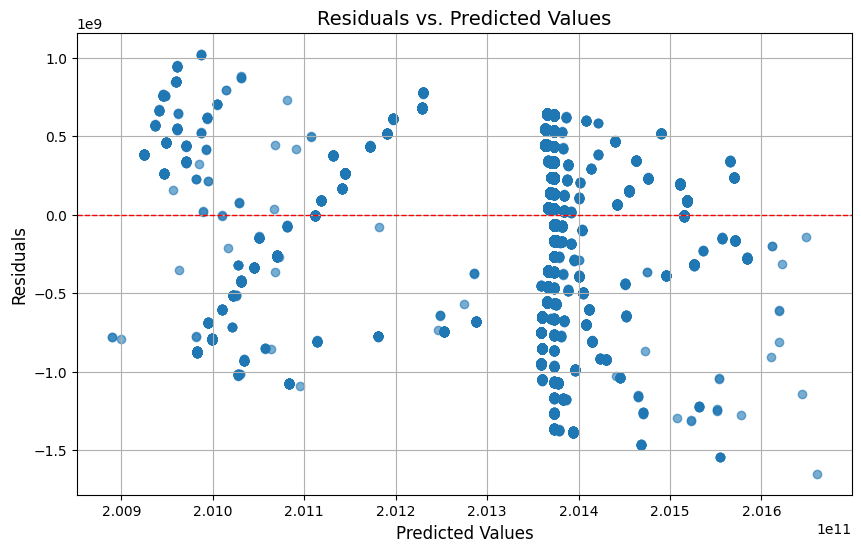

In [18]:
# Fit a simple OLS model for demonstration
# Assuming 'incidents' as the dependent variable and 'GDP' as an independent variable
df = df.dropna(subset=['GDP', 'political_stability'])  # Drop rows with NaN in key variables
X = sm.add_constant(df[['GDP', 'political_stability']])  # Add constant for OLS
y = df['incidents'] if 'incidents' in df.columns else df['eventid']  # Dependent variable

model = sm.OLS(y, X).fit()

# Residuals and predicted values
residuals = model.resid
predicted = model.fittedvalues

# Plot residuals vs. predicted values to check for heteroscedasticity
plt.figure(figsize=(10, 6))
plt.scatter(predicted, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.title("Residuals vs. Predicted Values", fontsize=14)
plt.xlabel("Predicted Values", fontsize=12)
plt.ylabel("Residuals", fontsize=12)
plt.grid(True)
plt.show()

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = grouped_data[['as_treatment', 'post_as', 'political_stability', 'GDP', 'corruption_perception_index']]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

                       feature       VIF
0                 as_treatment  3.264476
1                      post_as  2.125910
2          political_stability  2.307934
3                          GDP  3.354655
4  corruption_perception_index  3.994248


In [20]:
model = smf.ols(formula=formula, data=grouped_data).fit(cov_type='HC3')
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              incidents   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     6.083
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           5.31e-06
Time:                        01:56:47   Log-Likelihood:                -2127.7
No. Observations:                 284   AIC:                             4269.
Df Residuals:                     277   BIC:                             4295.
Df Model:                           6                                         
Covariance Type:                  HC3                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                     205.3075     86.375      2.377      0.017      36.016     374.599
as_treatment                   -2.7510     39.730     -0.069      0.945     -80.620      75.118
post_as                        15.6892     43.145      0.364      0.716     -68.874     100.252
as_treatment:post_as          181.4949     79.801      2.274      0.023      25.088     337.902
political_stability            -2.9775      0.767     -3.884      0.000      -4.480      -1.475
GDP                             0.0002    5.4e-05      2.936      0.003    5.27e-05       0.000
corruption_perception_index   -49.3403     17.269     -2.857      0.004     -83.187     -15.494
==============================================================================
Omnibus:                      313.325   Durbin-Watson:                   0.234
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11157.702
Skew:                           4.818   Prob(JB):                         0.00
Kurtosis:                      32.156   Cond. No.                     4.38e+06
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
[2] The condition number is large, 4.38e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
# DiD model for frequency of incidents
formula = "incidents ~ as_treatment * post_as + political_stability * corruption_perception_index * GDP"
model = smf.ols(formula=formula, data=grouped_data).fit(cov_type='HC3')

# Summarize the results
model.summary()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 10, but rank is 8
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              incidents   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     5.026
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           7.80e-06
Time:                        01:56:47   Log-Likelihood:                -2118.1
No. Observations:                 284   AIC:                             4258.
Df Residuals:                     273   BIC:                             4298.
Df Model:                          10                                         
Covariance Type:                  HC3                                         
=======================================================================================================================
                                                          coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
Intercept                                            -577.4029    153.223     -3.768      0.000    -877.715    -277.091
as_treatment                                          -25.3369     48.703     -0.520      0.603    -120.794      70.120
post_as                                                33.6414     52.399      0.642      0.521     -69.058     136.341
as_treatment:post_as                                  169.2343     81.331      2.081      0.037       9.828     328.641
political_stability                                     9.1743      4.589      1.999      0.046       0.179      18.169
corruption_perception_index                           111.1751     28.573      3.891      0.000      55.173     167.177
political_stability:corruption_perception_index        -1.8747      0.917     -2.045      0.041      -3.671      -0.078
GDP                                                     0.0019      0.000      4.659      0.000       0.001       0.003
political_stability:GDP                             -3.469e-05   1.01e-05     -3.438      0.001   -5.45e-05   -1.49e-05
corruption_perception_index:GDP                        -0.0004      0.000     -4.218      0.000      -0.001      -0.000
political_stability:corruption_perception_index:GDP  7.654e-06   2.19e-06      3.492      0.000    3.36e-06     1.2e-05
==============================================================================
Omnibus:                      305.162   Durbin-Watson:                   0.276
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10440.003
Skew:                           4.623   Prob(JB):                         0.00
Kurtosis:                      31.227   Cond. No.                     1.21e+09
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
[2] The condition number is large, 1.21e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
# Prepare data for the DID graph
# Group data by treatment and time (post_as) and calculate mean incidents
did_data = grouped_data.groupby(['as_treatment', 'post_as'])['incidents'].mean().reset_index()

# Rename treatment groups for better labeling
did_data['as_treatment'] = did_data['as_treatment'].replace({0: 'Control', 1: 'Treatment'})


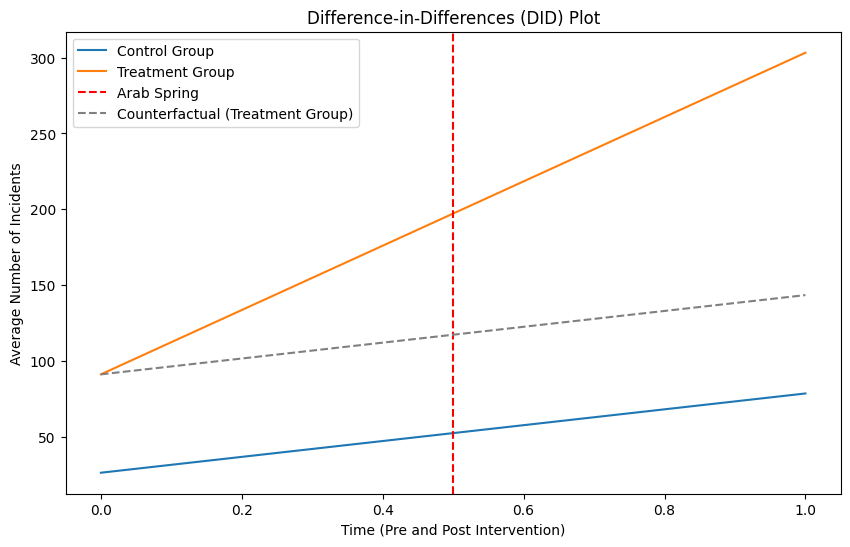

In [24]:
# Plot the DID graph
plt.figure(figsize=(10, 6))
for group in did_data['as_treatment'].unique():
    subset = did_data[did_data['as_treatment'] == group]
    plt.plot(
        subset['post_as'], subset['incidents'], label=f"{group} Group"
    )

# Add a dashed vertical line for the Arab Spring intervention
plt.axvline(x=0.5, color='red', linestyle='--', label='Arab Spring', linewidth=1.5)

# Add a parallel line to the Control Group to represent the counterfactual
control_pre = did_data[(did_data['as_treatment'] == 'Control') & (did_data['post_as'] == 0)]
control_post = did_data[(did_data['as_treatment'] == 'Control') & (did_data['post_as'] == 1)]

# Calculate the slope of the control group's line
control_slope = (control_post['incidents'].values[0] - control_pre['incidents'].values[0])
# Apply the same slope to the Treatment Group's pre-intervention point
treatment_pre = did_data[(did_data['as_treatment'] == 'Treatment') & (did_data['post_as'] == 0)]
counterfactual_point = treatment_pre['incidents'].values[0] + control_slope

# Draw the counterfactual line
plt.plot(
    [0, 1],  # x values
    [treatment_pre['incidents'].values[0], counterfactual_point],  # y values
    linestyle='--', color='grey', label='Counterfactual (Treatment Group)'
)

# Add labels, legend, and title
plt.title("Difference-in-Differences (DID) Plot")
plt.xlabel("Time (Pre and Post Intervention)")
plt.ylabel("Average Number of Incidents")
plt.legend()
plt.show()